In [1]:
import pandas as pd
import numpy as np

C:\Users\Alexey\AppData\Local\Temp\ipykernel_29268\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
f = open('7.txt')
num_features = int(f.readline())
n_train = int(f.readline())
D_train = np.array([list(map(float, f.readline().split())) for _ in range(n_train)])

n_test = int(f.readline())
D_test = np.array([list(map(float, f.readline().split())) for _ in range(n_test)])

# Задание 1

In [3]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler

В качестве функции оценки качества алгоритма используйте NRMSE, либо SMAPE. - `так как набор данных нормализован, применять будем MSE`

In [4]:
scaler = MinMaxScaler()
D_train = scaler.fit_transform(D_train)
D_test = scaler.fit_transform(D_test)

X_train, y_train = D_train[:, :-1], D_train[:, -1]
X_test, y_test = D_test[:, :-1], D_test[:, -1]

### Алгоритмы

Реализуйте алгоритмы нахождения уравнения прямой для задачи линейной регрессии:
МНК — метод наименьших квадратов (псевдообратная матрица / SVD);
градиентный спуск. - `параметр конструктора kernel`

На лекции мы рассматривали алгоритм градиентного спуска для классификации, однако его можно применять и для задач регрессии, важно лишь выбрать дифференцируемую функцию ошибки. В данном случае необходимо использовать среднюю квадратичную ошибку.

Требуется релизовать стохастический или пакетный градиентный спуск - `сделал и тот, и тот, просто нужно указать размер батча`. Напоминаем, что эмпирический риск нужно балансировать на каждой итерации при помощи экспоненциального скользящего среднего.

Для алгоритма градиентного спуска рекомендуется использовать начальную инициализацию весов wi [-12n;12n],где n— число признаков (см. лекцию). Шаг градиента необходимо уменьшать на каждой итерации, например: k=1k, k— номер итерации. Другие способы инициализации весов и уменьшения шага градиента использовать также можно использовать.

Алгоритм градиентного спуска необходимо запустить с ограничением по числу итераций итераций (не более 2000 итераций).

### Регуляризация

В реализации каждого из вышеупомянутых алгоритмов необходимо использовать регуляризацию. Для МНК гребневую регуляризацию, для градиентного один из методов на выбор - `выбрал Elastic Net, просто оба вида регуляризации, коэффициент подобрать нужно`.

In [6]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,175,176,177,178,179,180,181,182,183,184
0,0.0,0.862109,0.714659,0.464660,0.0,0.166389,0.155174,0.929973,0.0,0.866831,...,0.515368,0.0,0.000000,0.901497,0.933969,0.512367,1.000000,0.0,0.0,0.0
1,0.0,1.000000,0.924779,0.308827,0.0,0.284403,0.000000,1.000000,0.0,1.000000,...,0.285468,0.0,0.007928,1.000000,1.000000,0.129607,0.993230,0.0,0.0,0.0
2,0.0,0.881135,0.937883,0.514777,0.0,0.187177,0.109506,0.930716,0.0,0.902786,...,0.418924,0.0,0.066729,0.917170,0.932581,0.909506,0.933595,0.0,0.0,0.0
3,0.0,0.749836,0.464885,0.550527,0.0,0.141556,0.238130,0.824388,0.0,0.777903,...,0.537439,0.0,0.144180,0.803585,0.830696,0.151869,0.853987,0.0,0.0,0.0
4,0.0,0.777397,0.932071,0.621497,0.0,0.183605,0.201105,0.834090,0.0,0.806757,...,0.458262,0.0,0.171755,0.818906,0.833572,0.097072,0.828860,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2693,0.0,0.407159,0.360722,0.184495,0.0,0.995408,0.554168,0.151074,0.0,0.376159,...,0.199118,0.0,0.918832,0.256697,0.146165,0.425554,0.079218,0.0,0.0,0.0
2694,0.0,0.188656,0.298895,0.472116,0.0,0.852727,0.802224,0.026172,0.0,0.158095,...,0.519917,0.0,0.924702,0.087748,0.022631,0.741693,0.073525,0.0,0.0,0.0
2695,0.0,0.205212,0.044605,0.613434,0.0,0.850149,0.751722,0.024632,0.0,0.197386,...,0.413753,0.0,1.000000,0.106684,0.025061,0.750784,0.000000,0.0,0.0,0.0
2696,0.0,0.366516,0.147502,0.138083,0.0,1.000000,0.591051,0.108257,0.0,0.337152,...,0.221418,0.0,0.960213,0.216398,0.105171,0.069971,0.036273,0.0,0.0,0.0


In [36]:
def batch_generator(X, y, steps, batch_size=1):
    count = 1
    while count < steps:
        indices = np.arange(X.shape[0])
        shuffled_indices = np.random.choice(indices, indices.shape)
        if batch_size == -1:
            batch_size = X.shape[0]
        for i in range(0, X.shape[0], batch_size):
            idxs = shuffled_indices[i:i + batch_size]
            count += 1
            yield X[idxs], y[idxs]

class LinearRegression(BaseEstimator, RegressorMixin):
    def __init__(self, kernel='svd',
                 alpha=1.0,
                 reg=None,
                 l1_ratio=0.5,
                 learning_rate=None, 
                 eps=1e-9,
                 steps=2000,
                 batch_size=1,
                 ema=0.99,) -> None:
        self.kernel = kernel
        self.eps = eps
        self.learning_rate = learning_rate
        self.steps = steps
        self.batch_size = batch_size
        self.alpha = alpha
        self.reg = reg
        self.ema = ema
        
        if reg == 'l1':
            self.l1_ratio = 1
        elif reg == 'l2':
            self.l1_ratio = 0
        else:
            self.l1_ratio = l1_ratio
    
    def fit(self, X, y):
        n = X.shape[1]
        if self.kernel == 'pinv':
            self.weights = np.linalg.inv(X.T @ X + self.alpha * np.eye(n)) @ X.T @ y
        elif self.kernel == 'svd':
            U, S, Vh = np.linalg.svd(X, full_matrices=False)
            D = np.diag(S)
            self.weights = Vh.T @ np.linalg.inv(D @ D + self.alpha * np.eye(n)) @ D @ U.T @ y
        elif self.kernel == 'grad':
            self._init_weights(n)
            self.fit_gradient(X, y)

    def _init_weights(self, n):
        self.weights = np.random.uniform(-1 / (2 * n), -1 / (2 * n) + self.eps, n)

    def grad_(self, X, y):
        grad_mnk = 2 * (X @ self.weights - y) @ X
        l1_reg_value = self.alpha * self.l1_ratio * np.sign(self.weights)
        l2_reg_value = self.alpha * (1 - self.l1_ratio) * self.weights
        return grad_mnk + l1_reg_value + l2_reg_value # elasticnet

    
    def fit_gradient(self, X, y, scorer=None):
        if scorer is not None:
            scores = []
        grad = 0
        for i, batch in enumerate(batch_generator(X, y, self.steps, batch_size=self.batch_size)):
            X_, y_ = batch
            lr = self.learning_rate * (1 - i / self.steps)
            grad = self.ema * self.grad_(X_, y_) + (1 - self.ema) * grad # exponential moving average
            self.weights -= lr * grad
            if scorer is not None:
                scores.append(scorer(y, self.predict(X)))
        if scorer is not None:
            return scores                

    def predict(self, X):
        return X @ self.weights

In [37]:
model = LinearRegression(kernel='grad', learning_rate=1e-5, alpha=0.7, steps=2000, batch_size=1)
model.fit(X_train, y_train)
r2_score(y_test, model.predict(X_test))

-5.75001319395153

### Настройка и анализ

Для каждого алгоритма найдите наилучшие гиперпараметры, а именно, параметры регуляризации, и выведите лучшие соответствующие результаты с точки зрения выбранной Вами функции ошибки.  Перебирать различные способы инициализации вектора весов и уменьшения шага градиента в качестве гиперпараметров не требуется. - `см. GridSearch и графики`

In [38]:
param_grid = {'kernel': ['svd', 'pinv', 'grad'],
              'alpha': np.arange(0.2, 1.1, 0.1),
              'l1_ratio': np.arange(0.1, 1.1, 0.1),
              }
scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid = GridSearchCV(model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=8)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LinearRegression(alpha=0.7, kernel='grad',
                                        learning_rate=1e-05),
             n_jobs=8,
             param_grid={'alpha': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel': ['svd', 'pinv', 'grad'],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [39]:
grid.best_params_

{'alpha': 0.2, 'kernel': 'svd', 'l1_ratio': 0.1}

Лучшая модель на данном датасете - основанная на псевдообратной матрице.

Для алгоритма градиентного спуска постройте график зависимости функции оценки качества (NRMSE или SMAPE) на тренировочном и тестовом множестве от количества итераций.

In [40]:
param_grid = {'kernel': ['grad'],
              'alpha': np.arange(0.2, 1.1, 0.1),
              'l1_ratio': np.arange(0.1, 1.1, 0.1),
              }
model._init_weights(X_train.shape[1])
scorer = make_scorer(mean_squared_error, greater_is_better=False)
grid = GridSearchCV(model, param_grid=param_grid, scoring=scorer, cv=5, n_jobs=8)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LinearRegression(alpha=0.7, kernel='grad',
                                        learning_rate=1e-05),
             n_jobs=8,
             param_grid={'alpha': array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'kernel': ['grad'],
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring=make_scorer(mean_squared_error, greater_is_better=False, response_method='predict'))

In [41]:
best_estimator = grid.best_estimator_
scores_test = best_estimator.fit_gradient(X_test, y_test, scorer=mean_squared_error)
scores_train = best_estimator.fit_gradient(X_train, y_train, scorer=mean_squared_error)
len(scores_train), len(scores_test)

(2698, 2048)

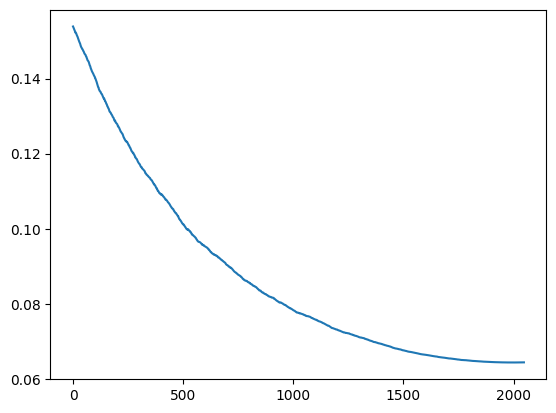

In [42]:
import matplotlib.pyplot as plt

plt.plot(scores_test)

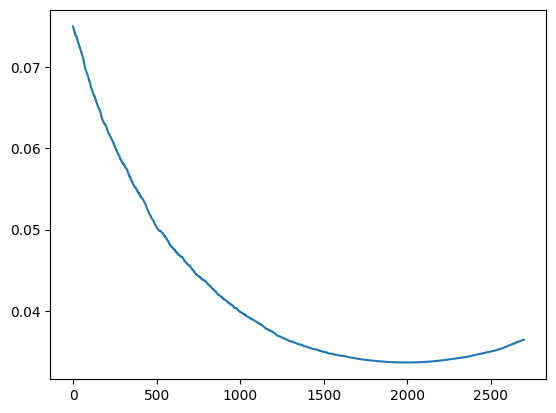

In [43]:
plt.plot(scores_train)

# Задание 2
### Алгоритм и его настройка

Реализуйте метод опорных векторов и три ядра для него (можно использовать sklearn): 
1) линейное ядро;
2) полиномиальное ядро со степенью;
3) гауссово ядро с радиальной базисной функцией.

Для каждого набора данных и ядра найдите лучшие гиперпараметры ядра: степень полинома для полиномиального ядра {2, 3, 4, 5} и =[1,..., 5] для гауссова ядра K(x, y) = exp(- ||x-y||2), а также ограничения на коэффициенты опорных векторов C=[0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]. 
Для выбора наилучших параметров используйте точность (accuracy) посчитанную при перекрёстной проверке.
	После нахождения оптимальных параметров для каждого набора данных и ядра выведите найденную точность, гиперпараметры алгоритма, при которых она была достигнута.

### Анализ

Для каждого набора данных и каждого ядра нарисуйте, как реализованный алгоритм (с лучшими прочими гиперпараметрами) работает в исходном пространстве. Для изображения классификатор следует обучать на всём наборе данных, тестовым множеством в этом случае будет всё пространство.


In [44]:
chips = pd.read_csv('chips.csv')
geyser = pd.read_csv('geyser.csv')

In [45]:
X_chips, y_chips = chips[['x', 'y']], chips['class']
X_geyser, y_geyser =geyser[['x', 'y']], geyser['class']

In [46]:
chips.head()

,x,y,class
0,0.051267,0.69956,P
1,-0.092742,0.68494,P
2,-0.213710,0.69225,P
3,-0.375000,0.50219,P
4,-0.513250,0.46564,P


In [47]:
geyser.head()

,x,y,class
0,1,4.4,N
1,1,3.9,N
2,1,4.0,P
3,1,4.0,N
4,1,3.5,N


In [48]:
from sklearn.svm import SVC

In [49]:
def fit_kernel(kernel, param_grid, dataset):
    grid = GridSearchCV(SVC(kernel=kernel),
                        param_grid=param_grid,
                        cv=10,
                        scoring='accuracy')
    grid.fit(*dataset)
    return grid.best_estimator_

In [50]:
params_linear = {
    "C": [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
}
params_poly = {
    'degree': [2, 3, 4, 5],
    "C": [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
}
params_rbf = {
    'gamma': [1, 2, 3, 4, 5],
    "C": [0.05, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]
}


Для каждого датасета выбираем лучшие параметры для каждого ядра:

In [51]:
results = {}
for name, dataset in zip(['chips', 'geyser'],
                         [(X_chips, y_chips), (X_geyser, y_geyser)]):
    results[name] = []
    for kernel, params in zip(['linear', 'poly', 'rbf'],
                              [params_linear, params_poly, params_rbf]):
        results[name].append((kernel, fit_kernel(kernel, params, dataset)))

In [52]:
results

{'chips': [('linear', SVC(C=0.05, kernel='linear')),
  ('poly', SVC(degree=2, kernel='poly')),
  ('rbf', SVC(gamma=1))],
 'geyser': [('linear', SVC(C=0.5, kernel='linear')),
  ('poly', SVC(C=50.0, degree=2, kernel='poly')),
  ('rbf', SVC(C=0.5, gamma=1))]}

In [101]:
from sklearn.inspection import DecisionBoundaryDisplay


def plot_training_data_with_decision_boundary(clf, colors, *dataset):
    # Train the SVC
    X, y = dataset
    clf.fit(X, y)

    # Settings for plotting
    _, ax = plt.subplots(figsize=(10, 10))

    # Plot decision boundary and margins
    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    # Plot bigger circles around samples that serve as support vectors
    ax.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=250,
        facecolors="none",
        edgecolors="k",
    )
    # Plot samples by color and add legend
    ax.scatter(X['x'], X['y'], c=colors, s=150, edgecolors="k")
    ax.set_title(f" Decision boundaries of {clf.kernel} kernel in SVC")

    _ = plt.show()

def plot_boundaries(models, *dataset):
    for _, clf in models:
        colors = list(map(lambda x: 'red' if x == 'N' else 'green', dataset[1]))
        plot_training_data_with_decision_boundary(clf, colors, *dataset)

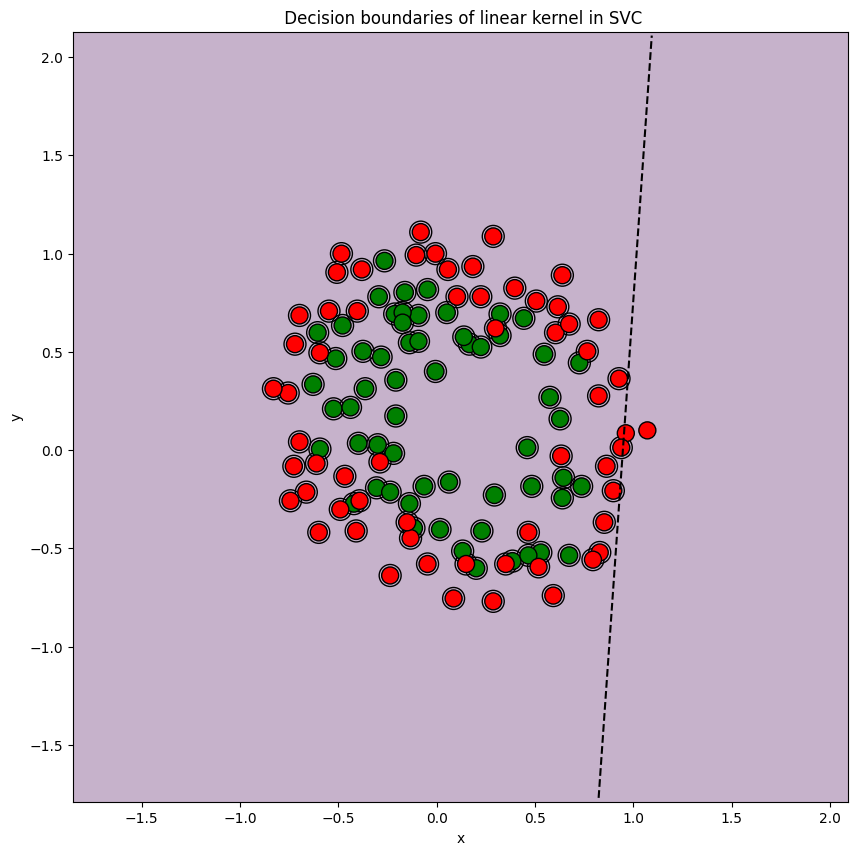

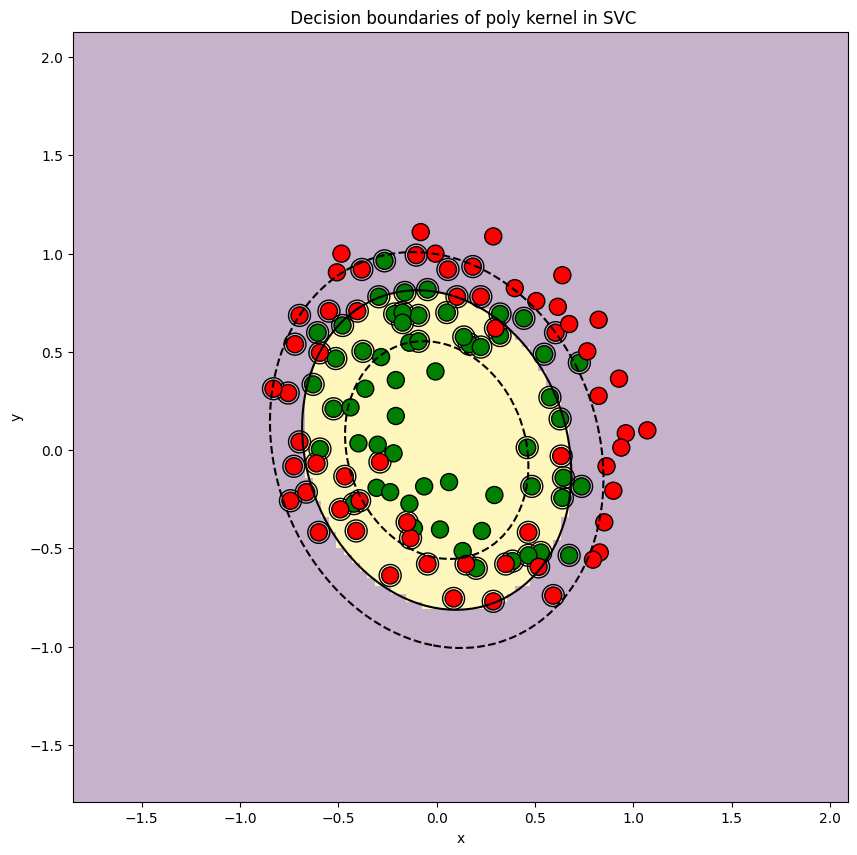

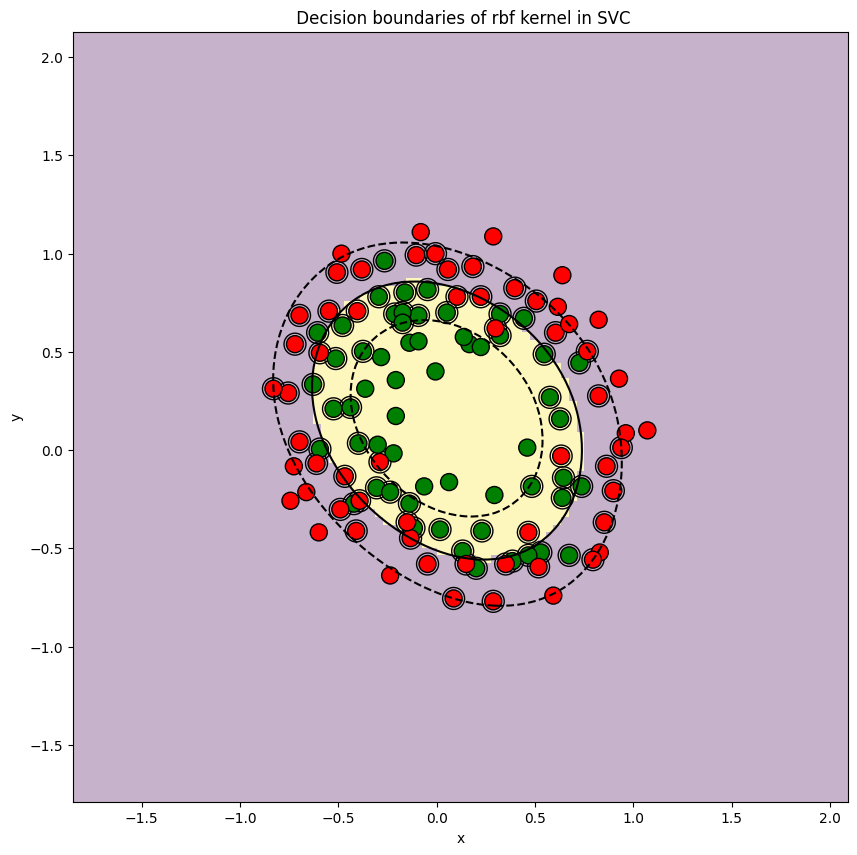

In [102]:
plot_boundaries(results['chips'], X_chips, y_chips)

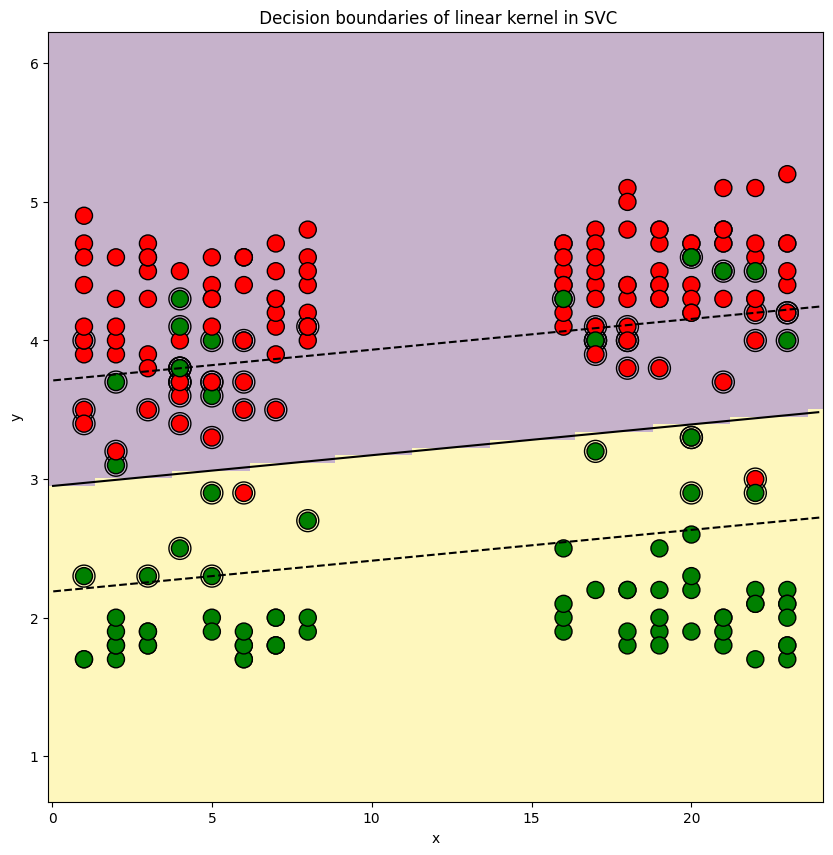

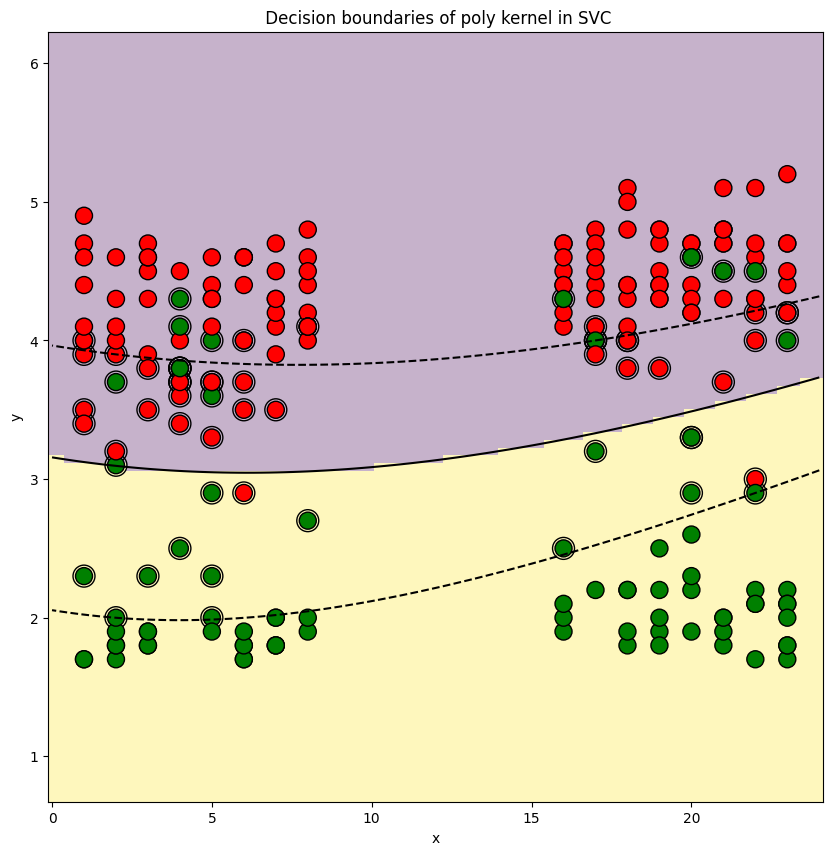

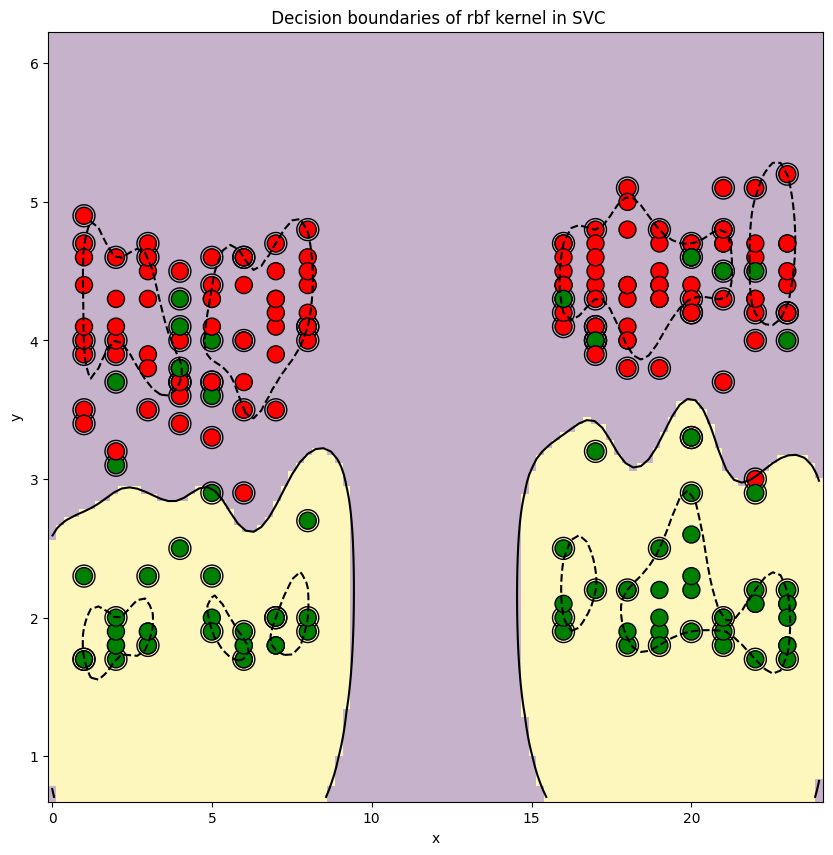

In [103]:
plot_boundaries(results['geyser'], X_geyser, y_geyser)